
<h1>People Analytics - Tely<h1>
   


 **Nome: Bruno Soares de oliveira Lopes**
 
 **Curso: Engenharia de Computação - UFPB**
    
 **Periodo: 4P**

**Importanto Pacote Pandas, Matplotlib**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

**Lendo o conjunto de dados CSV**

In [2]:
def read(arquivo):
    leitura = pd.read_csv(arquivo, encoding='utf-8', sep=',' )
    return leitura

Case_Analytics = read('Case Analytics.csv')


**Visualizar o Head do Dataframe**

In [3]:
Case_Analytics.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


**Exibir as colunas do DataFrame para uma melhor analise**

In [4]:
Case_Analytics.columns.values

array(['EmployeeID', 'recorddate_key', 'birthdate_key',
       'orighiredate_key', 'terminationdate_key', 'age',
       'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'gender_full', 'termreason_desc',
       'termtype_desc', 'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT'],
      dtype=object)

**Remover dados duplicados**

In [5]:
Case_Analytics = Case_Analytics.drop_duplicates(subset="EmployeeID",keep='last', inplace = False)

**Selecionar colunas mais relevantes para analisar.**
**Nesse primeiro caso, será analisado fun.**

In [6]:
Colunas_Selec = ['EmployeeID','gender_full']

In [7]:
Case_Analytics_Selec = Case_Analytics.filter(items = Colunas_Selec)

**Quantidade de colaboradores**

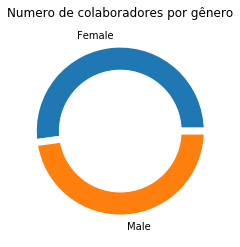

In [8]:
cat_genero = Case_Analytics_Selec["gender_full"].value_counts().index
cat_numer = Case_Analytics_Selec["gender_full"].value_counts().values

m_circ = plt.Circle((0,0),0.7,color='white')


plt.pie(cat_numer,labels = cat_genero,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p= plt.gcf()
plt.title('Numero de colaboradores por gênero')
p.gca().add_artist(m_circ)
plt.show()

In [9]:
Colunas_Selec_Gn_Status = ['gender_full','STATUS']

In [10]:
Case_Analytics_Selec_G_Status = Case_Analytics.filter(items = Colunas_Selec_Gn_Status)

In [11]:
Case_Analytics_Selec_G_Status.head()

,gender_full,STATUS
9,Male,ACTIVE
19,Female,ACTIVE
29,Female,ACTIVE
39,Male,ACTIVE
49,Male,ACTIVE


**Quantidade de colaboradores ativos e inativos**

[76.37, 23.63]


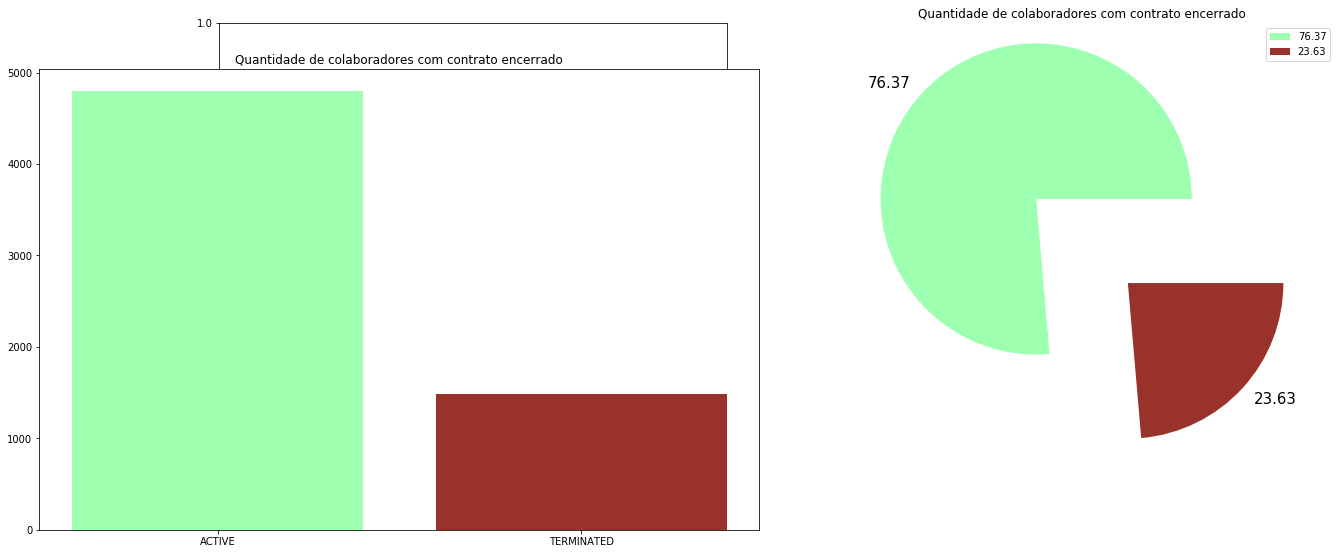

In [12]:
fig = plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
ax = fig.add_axes([0,0,0.5,0.8])
langs = Case_Analytics_Selec_G_Status["STATUS"].value_counts().index
students = Case_Analytics_Selec_G_Status["STATUS"].value_counts().values
ax.bar(langs,students,color =["#9dffb0","#99322b"])
plt.title('Quantidade de colaboradores com contrato encerrado')
plt.subplot(1, 2, 2)

List_colaboradores = list(students)
list_porcent = []
for i in range(0,len(List_colaboradores)):
    list_porcent.append(float('{:.02f}'.format((List_colaboradores[i]*100)/sum(students))))
print(list_porcent)

plt.pie(students, 
        labels = list_porcent,
        colors  =["#9dffb0","#99322b"],
        labeldistance = 1.1,
        explode = [0,.8],
        textprops = {"fontsize": 15}, 
        )
plt.axis("equal")
plt.title("Quantidade de colaboradores com contrato encerrado")
plt.legend()

In [13]:
Colunas_Selec_City_Satus = ['city_name','STATUS']

Case_Analytics_Ci_Status = Case_Analytics.filter(items = Colunas_Selec_City_Satus)

In [15]:
N_City_T = Case_Analytics_Ci_Status.query('STATUS=="TERMINATED"')
N_City_A = Case_Analytics_Ci_Status.query('STATUS=="ACTIVE"')

**Numero de colaboradores com a situação de Saida/Cidades**

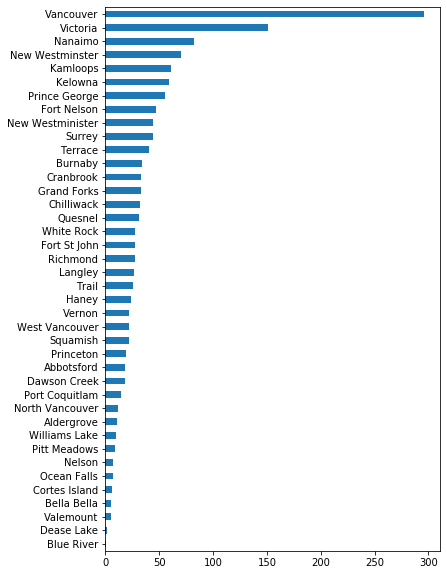

In [16]:
N_City_T['city_name'].value_counts()[::-1].plot(kind='barh', figsize=(6,10))

**Numero de colaboradores com a situação de Ativos/Cidades**

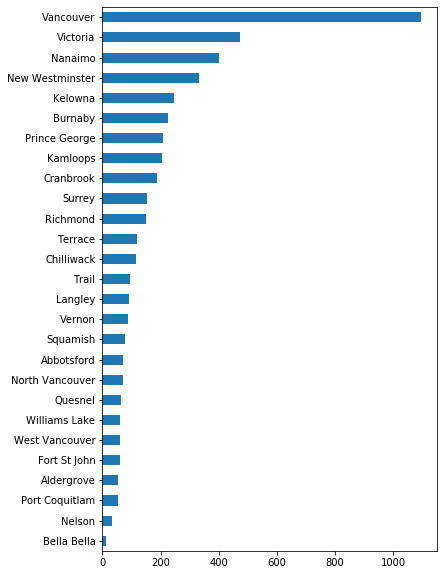

In [17]:
N_City_A['city_name'].value_counts()[::-1].plot(kind='barh', figsize=(6,10))

In [19]:
Case_Analytics.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
19,1319,12/31/2015 0:00,1/3/1957,8/28/1989,1/1/1900,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
29,1320,12/31/2015 0:00,1/2/1955,8/28/1989,1/1/1900,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
39,1321,12/31/2015 0:00,1/2/1959,8/28/1989,1/1/1900,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
49,1322,12/31/2015 0:00,1/9/1958,8/31/1989,1/1/1900,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [20]:
Colunas_Selec_dep_Status = ['department_name','STATUS']

Case_Analytics_dep_Status = Case_Analytics.filter(items = Colunas_Selec_dep_Status)

N_Dep_T = Case_Analytics_dep_Status.query('STATUS=="TERMINATED"')
N_Dep_A = Case_Analytics_dep_Status.query('STATUS=="ACTIVE"')

**10 Departamentos que teve mais situação em saida/Departamentos**

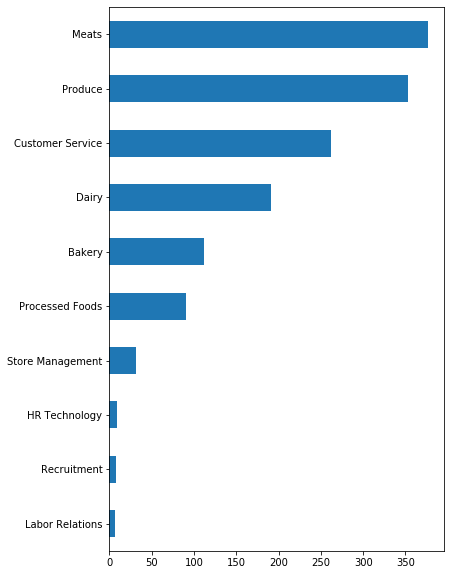

In [21]:
N_Dep_T['department_name'].value_counts().head(10)[::-1].plot(kind='barh', figsize=(6,10))

**10 Departamentos que teve mais situação em Ativo/Departamentos**

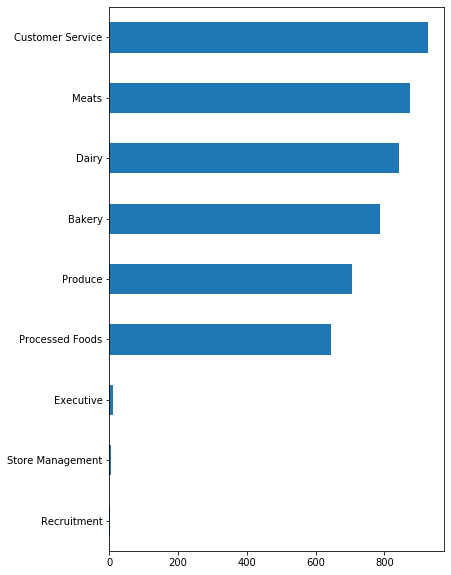

In [22]:
N_Dep_A['department_name'].value_counts().head(10)[::-1].plot(kind='barh', figsize=(6,10))

In [23]:
Colunas_Selec_Age_Status = ['age','STATUS']

Case_Analytics_Age_Status = Case_Analytics.filter(items = Colunas_Selec_Age_Status)

N_Age_T = Case_Analytics_Age_Status.query('STATUS=="TERMINATED"')
N_Age_A = Case_Analytics_Age_Status.query('STATUS=="ACTIVE"')

**Colaboradores com situação de Saida/Idade**

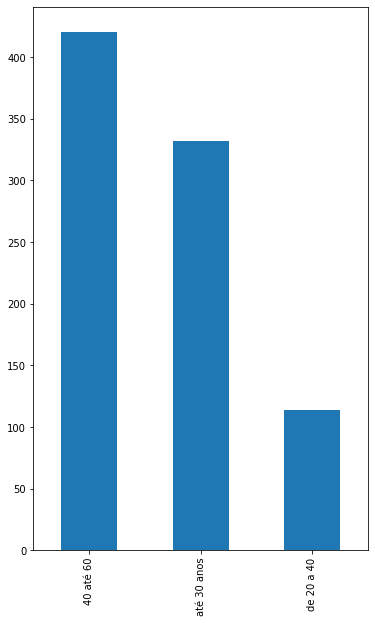

In [24]:
pd.cut(N_Age_T.age, bins = [0,30,40,60], labels = ['até 30 anos','de 20 a 40','40 até 60']).value_counts().plot(kind='bar', figsize=(6,10))

**Colaboradores com situação Ativa/Idade**

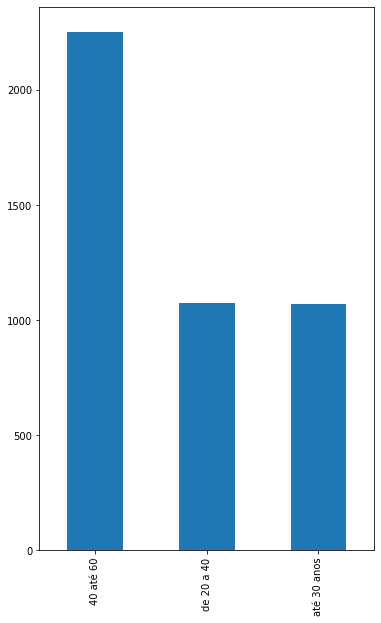

In [25]:
pd.cut(N_Age_A.age, bins = [0,30,40,60], labels = ['até 30 anos','de 20 a 40','40 até 60']).value_counts().plot(kind='bar', figsize=(6,10))

In [26]:
Colunas_Selec_Motivo_Status = ['termtype_desc','STATUS','gender_full']

Case_Analytics_Motivo_Status = Case_Analytics.filter(items = Colunas_Selec_Motivo_Status)

N_Motivo_T_M = Case_Analytics_Motivo_Status.query('STATUS=="TERMINATED"').query('gender_full=="Male"')
N_Motivo_T_F = Case_Analytics_Motivo_Status.query('STATUS=="TERMINATED"').query('gender_full=="Female"')

**Motivos que levou colaboradores do Gênero Masculino a deixar a empresa**

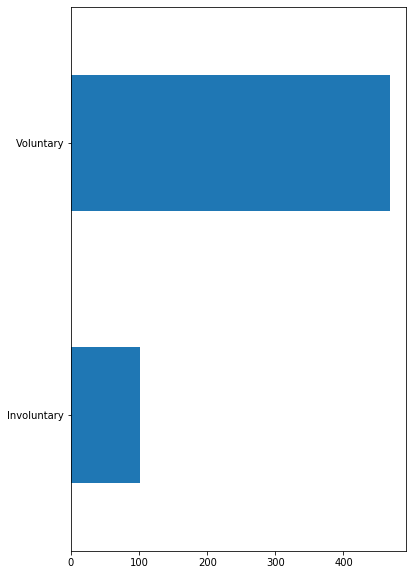

In [27]:
N_Motivo_T_M['termtype_desc'].value_counts()[::-1].plot(kind='barh', figsize=(6,10))

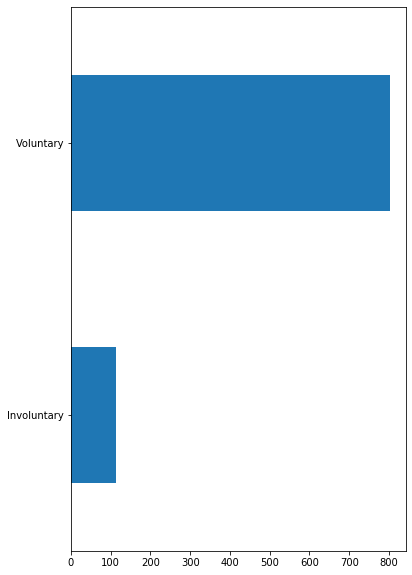

In [28]:
N_Motivo_T_F['termtype_desc'].value_counts()[::-1].plot(kind='barh', figsize=(6,10))

Observando os dados coletados temos:

**O numero de funcionarias é maior que o de funcionarios**
**cerca de 23.63% dos funcionarios teve registro de desligamento da função**


**A maior quantidade de funcionarios com situação de desligamento na Cidade de Vancouver**
**Porem o maior numero de colaboradores tambem é em Vancouver**

**Entre os departamentos que mais ouve saida foi o de Meats, porem foi o segundo com mais contratação**

**Em relação a idade, após estabelecer uma faixa de idade, é notável que pessoas entre 40 a 60 são os que mais tiveram situação de saida.**
**E que o numero de Funcionarios Ativos na faixa de 40 a 60 anos também ser grande, levantando uma questão de que a idade da maioria da empresa ja é considerada avançada, por um ponto positivo é consideravel um grupo experiente, por outro deve-se analisar contratação de pessoas mais jovens por causa de uma futura aposentadoria.**


**A Maioria dos motivos que levou para o termino de contrato foi Voluntario entre os dois Gêneros, mas no caso do Sexo Feminino o número foi mais significativo, levantando a questão de haver mais contratação nesse gênero.**

**Foi Possivel ter Clusters, um deles no agrupamento dos Departamentos com numero de desligamentos dos colaboradores, também no Numero de identificação com o Gênero, gerando a quantidade de pessoas por sexo, entre outras combinações**